In [1]:
from importlib import reload

import torch
from torch import nn
from torch.utils.data import DataLoader

%load_ext tensorboard

import dataset, model, trainer

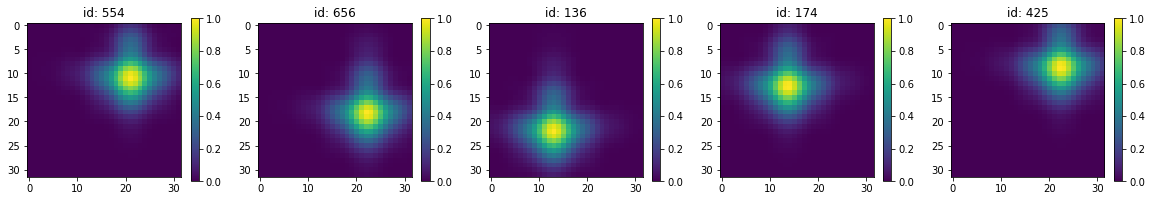

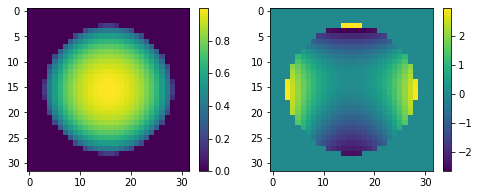

In [2]:
training_data = dataset.FourierOptics2DPSFDataset(length=1024, psf_zerns={4:0, 5:3, 7:0.5}, noise_params={} )
# training_data = dataset.FourierOptics2DPSFDataset(length=1024, psf_zerns={}, noise_params={} )
dataset.inspect_psfs(training_data)

train_dataloader = DataLoader(training_data, batch_size=128, shuffle=True)

In [40]:
reload(trainer)


fitting_model =  model.FourierOptics2DModel()

training = trainer.FittingTrainer(fitting_model, train_dataloader)

# training.train_single_epoch()
# training.validate()



CUDA not available. Defaulting to CPU
Device: cpu


In [ ]:
training.train_and_validate(100000)

----------------------------------------------------------------------------------------------------
Starting training Epoch # 0
Epoch # 0, Batch # 7 (1024/1024), loss = 0.045244
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Starting training Epoch # 1
Epoch # 1, Batch # 7 (1024/1024), loss = 0.041104
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Starting training Epoch # 2
Epoch # 2, Batch # 7 (1024/1024), loss = 0.039640
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Starting training Epoch # 3
Epoch # 3, Batch # 7 (1024/1024

In [5]:
%tensorboard --logdir=runs

In [10]:
dir(train_dataloader)

['_DataLoader__initialized',
 '_DataLoader__multiprocessing_context',
 '_IterableDataset_len_called',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_auto_collation',
 '_dataset_kind',
 '_get_iterator',
 '_index_sampler',
 '_is_protocol',
 '_iterator',
 'batch_sampler',
 'batch_size',
 'check_worker_number_rationality',
 'collate_fn',
 'dataset',
 'drop_last',
 'generator',
 'multiprocessing_context',
 'num_workers',
 'persistent_workers',
 'pin_memory',
 'prefetch_factor',
 'sampler',
 'timeout',
 'worker_init_fn']